# Case 1.
**Neural Networks for Machine Learning Applications**<br>
06.02.2022<br>
Dhruval Kikani and Gajalakshan Chandrasegaran<br>
Metropolia University of Applied Sciences

## 1. Introduction

This report shows information regarding heart diseases health inidcators, the aim is to determine whether the patient is diseased or healthy using different nueral networks methods and tools. 

## 2. Setup

The following libraries and functions were used

In [1]:
# Data science and visualization
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# Models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from tensorflow.keras import models, layers, losses, metrics, optimizers

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

## 3. Dataset

In [2]:
#Reading the data file
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 4. Preprocessing

In [3]:
#Displayong the datatypes of the features
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [4]:
# All features are in a numeric format so we don't have to transform any of our data
df.dtypes.value_counts()

float64    22
dtype: int64

In [5]:
#Dispalying basic stats
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
# Checking for missing values
df.isna().sum().sum()

0

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

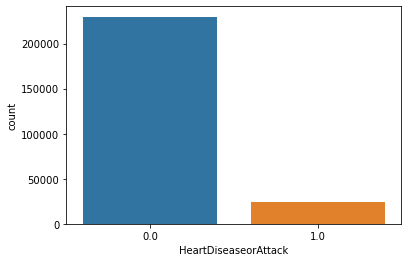

In [22]:
#checking if the dataset is imbalanced
sns.countplot(data =df , x ='HeartDiseaseorAttack')

The data is imbalanced (concluded from the above graph) we have to resample the data. 

In [7]:
#Resampling the data

#creating two different dataframe of majority and minority class
df_majority = df[(df['HeartDiseaseorAttack']==0)] 
df_minority = df[(df['HeartDiseaseorAttack']==1)]

# upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 229787, # to match majority class
                                 random_state=42)  # reproducible results

# Combining majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

df_upsampled['HeartDiseaseorAttack'].value_counts()



1.0    229787
0.0    229787
Name: HeartDiseaseorAttack, dtype: int64

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

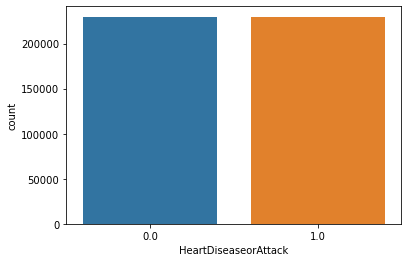

In [8]:
#Dispalying the result
sns.countplot(data =df_upsampled , x ='HeartDiseaseorAttack')

The dataset is now balanced (Concluded from the graph)

In [9]:
X = df_upsampled.drop('HeartDiseaseorAttack',axis =1)
y = df_upsampled['HeartDiseaseorAttack']

In [10]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 5. Modeling

For the model, we ended with up with a 5 layer model including the normalizer, the activaiton functions used for modeling are 'Relu' for hidden layers as it was giving the most appropirate output.
After trying various loss fucntions we decided to go with 'binary_crossentropy' for the loss function and 'adam' for the optimizer setting as it seemed more consistent to us.
The metrics we used is 'accuracy' beacause it made more sense for the overall accuaracy. 

In [11]:
#normilsation
normalize = layers.Normalization()
normalize.adapt(X_train)

model = models.Sequential([
        normalize,
        layers.Dense(6,activation = 'relu'),
        layers.Dense(6,activation = 'relu'),
        layers.Dense(6,activation = 'relu'),
        layers.Dense(1,activation = 'sigmoid') ])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 21)               43        
 n)                                                              
                                                                 
 dense (Dense)               (None, 6)                 132       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 266
Trainable params: 223
Non-trainable params: 43
_________________________________________________________

## 6. Training

For training we tested different epochs and batch sizes, changing the epochs did not have siginificant affects but resulted in high computation time,batchsize 32 is good fit sinc e it gave a decent accuracy outcome, so that's the value we chose. A higher batch size can result in the data being too underfitted.

In [ ]:
EPOCHS = 65
t0 = time.time()
H = model.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size = 32,
    verbose =0,
    )

t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime/EPOCHS:.3f} s/epoch')

## 7. Evaluation and performance

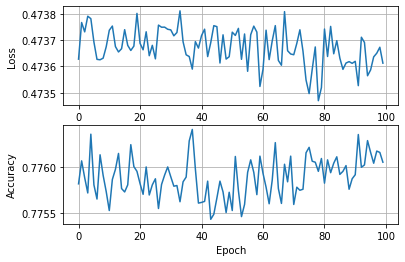

In [36]:
epochs = H.epoch
loss = H.history['loss']
acc = H.history['accuracy']

plt.subplot(2, 1, 1)
plt.plot(epochs, loss)
plt.grid()
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs, acc)
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [28]:
print(f'Training loss = {loss[-1]:.3f}')
print(f'Training accuracy = {acc[-1]:.3f}')

Training loss = 0.474
Training accuracy = 0.776


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_acc:.3f}')

Test loss = 0.471
Test accuracy = 0.777


In [30]:
predictions = model.predict(X_train)
pred_labels = 1.0*(predictions >= 0.5)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_train, pred_labels).ravel()
print('              Confusion matrix')
print(f'                 Prediction')
print(f'Diagnose  Healthy   Disease      SUM')
print(f'Healthy  {tn:8d}  {fp:8d} {tn+fp:8d}')
print(f'Disease  {fn:8d}  {tp:8d} {fn+tp:8d}')
print(f'SUM      {tn+fn:8d}  {fp+tp:8d} {tn+fp+fn+tp:8d}')

              Confusion matrix
                 Prediction
Diagnose  Healthy   Disease      SUM
Healthy    125200     47268   172468
Disease     30161    142051   172212
SUM        155361    189319   344680


In [20]:
cr = classification_report(y_train, pred_labels, target_names = ['Healthy', 'Disease'])
print(cr)


              precision    recall  f1-score   support

     Healthy       0.81      0.73      0.76    172468
     Disease       0.75      0.82      0.79    172212

    accuracy                           0.78    344680
   macro avg       0.78      0.78      0.77    344680
weighted avg       0.78      0.78      0.77    344680



In [34]:
print(f'Precision for Healthy = {tn/(tn+fn):.2f}')
print(f'Precision for Disease = {tp/(fp+tp):.2f}')

Precision for Healthy = 0.81
Precision for Disease = 0.75


In [35]:
test_results = model.evaluate(X_test,y_test, verbose=0)
test_results

[0.47082188725471497, 0.7771598100662231]

# 7. Conclusion

For this case study we used different techniques,models and tools to get an end result as accuarate as possible,we got accauracy of 77 percent which seems reasonable enough.

The data was unbalanced and balancing was important since it would give unsually have precesion if not balanced.

Our final model included a 5 layer model with 'relu' as activation function and first layer is simply the normalized data layer, and the last layer has one element and the Sigmoid activation function.
A 4 layer model was also tried but it was not finalised since its accuracy was a bit off point.

The number of epochs in the final model is 65, and the batch size is 32. These gave the best outcomes in terms of size and accuracy of the model, as the accuracy did not really increase with additional epochs.

At the end we were able to acheive precision 0.81 for healthy and 0.75 for diseased using this model. 
